--Importación de librerias--

In [3]:
#Importamos las librerías necesarias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

--Definiendo la ruta y asignando el dataset--

In [16]:
#Cargamos el dataset de Titanic
#URL del dataset de Titanic: https://www.kaggle.com/c/titanic/data
titanic_path = 'D:\\Hacking\\Python\\AI_Learning\\Aprendizaje_Supervisado\\Titanic\\titanic.csv'
titanic_data = pd.read_csv(titanic_path)

--Marcando las caracteristicas de entrenamiento del modelo y la variable objetivo--

In [17]:
#Seleccionamos las caracteristicas que vamos a utilizar (incluyendo categoricas y numericas)
titanic_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
#Seleccionamos la variable objetivo que vamos a predecir
titanic_target = 'Survived'

--Filtrado de datos--

In [18]:
#Eliminamos filas con valores nulos en las caracteristicas y la variable objetivo
titanic_data = titanic_data[titanic_features + [titanic_target]].dropna()

--Asignacion de caracteristicas a las variables de entrenamiento y testeo--

In [19]:
#One-hot encoding de las caracteristicas categoricas
X = pd.get_dummies(titanic_data[titanic_features])
y = titanic_data[titanic_target]

In [20]:
#Dividimos los datos en dos conjuntos: entrenamiento y prueba
#test_size=0.2 significa que el 20% de los datos se utilizaran para probar el modelo
#random_state=42 asegura que la division sea reproducible
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=12)

--Definiendo y entrenando el Modelo de Árbol de Decisión--

In [7]:
#Defimos el modelo de arbol de decision que vamos a utilizar
#El modelo DecisionTreeClassifier es utilizado para problemas de clasificacion
#En este caso, vamos a predecir si un pasajero sobrevivio o no al
#Añadimos el random_state para que el modelo no cambie en cada ejecucion
#Esto es importante para que los resultados sean reproducibles
titanic_dt_model = DecisionTreeClassifier(random_state=12)
#Ajustamos el modelo a los datos
titanic_dt_model.fit(train_X, train_y)
#Generamos una prediccion de los datos con el modelo
titanic_dt_preds = titanic_dt_model.predict(test_X)


--Evaluación del modelo--

In [8]:
#Calculamos la precision del modelo
titanic_dt_accuracy = accuracy_score(test_y, titanic_dt_preds)
print(f"Precisión del Árbol de Decisión: {titanic_dt_accuracy:.4f}")

Precisión del Árbol de Decisión: 1.0000


--Definiendo y entrenando el Modelo Random Forest--

In [9]:
#Definimos el modelo de Random Forest que vamos a utilizar
#Numero de arboles en el bosque por defecto es 100
#En este caso, vamos a predecir si un pasajero sobrevivio o no al
#Añadimos el random_state para que el modelo no cambie en cada ejecucion
#Esto es importante para que los resultados sean reproducibles
titanic_rf_model = RandomForestClassifier(random_state=12)
#Ajustamos el modelo a los datos
titanic_rf_model.fit(train_X, train_y)
#Generamos una prediccion de los datos con el modelo
titanic_rf_preds = titanic_rf_model.predict(test_X)


--Evaluación del modelo--

In [10]:
#Calculamos la precision del modelo
titanic_rf_accuracy = accuracy_score(test_y, titanic_rf_preds)
print(f"Precisión del Random Forest: {titanic_rf_accuracy:.4f}")

Precisión del Random Forest: 1.0000


--Analizando que variables han sido más importantes--

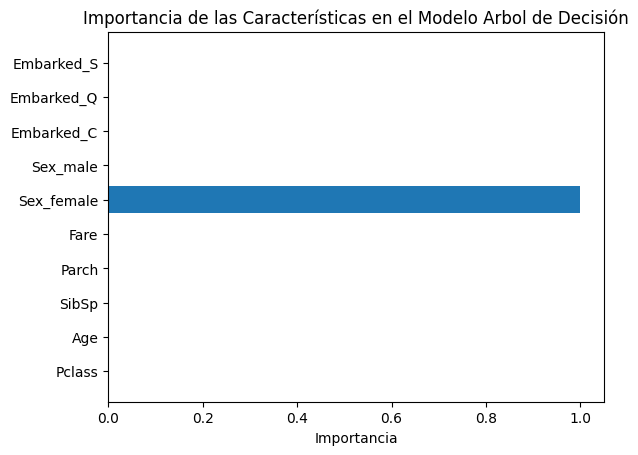

In [11]:
#Librería para representar gráficamente la importancia de las características
import matplotlib.pyplot as plt

#Visualizamos la importancia de las características en el modelo de Arbol de Decisión
#feature_importances_ devuelve la importancia de cada característica
#feature_names son los nombres de las características utilizadas en el modelo
importances = titanic_dt_model.feature_importances_
feature_names = train_X.columns

#Mostramos la importancia de las características en un gráfico de barras
plt.barh(feature_names, importances)
plt.xlabel('Importancia')
plt.title('Importancia de las Características en el Modelo Arbol de Decisión')
plt.show()

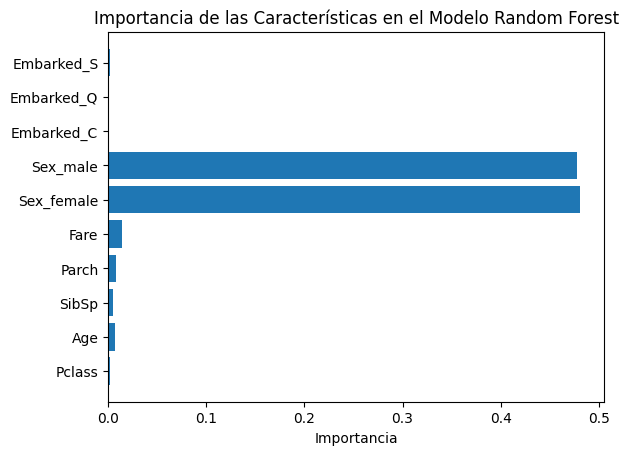

In [12]:
#Librería para representar gráficamente la importancia de las características
import matplotlib.pyplot as plt

#Visualizamos la importancia de las características en el modelo Random Forest
#feature_importances_ devuelve la importancia de cada característica
#feature_names son los nombres de las características utilizadas en el modelo
importances = titanic_rf_model.feature_importances_
feature_names = train_X.columns

#Mostramos la importancia de las características en un gráfico de barras
plt.barh(feature_names, importances)
plt.xlabel('Importancia')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.show()

--Guardando los modelos entrenados--

In [14]:
import joblib
#Guardamos los modelos ya entrenados
joblib.dump(titanic_dt_model, 'titanic_dt_model.pkl')
joblib.dump(titanic_rf_model, 'titanic_rf_model.pkl')

['titanic_rf_model.pkl']

--Cargando los modelos entrenados--

In [1]:
import joblib
#Para cargar los modelos guardados y usarlos posteriormente
titanic_dt_model_loaded = joblib.load('titanic_dt_model.pkl')
titanic_rf_model_loaded = joblib.load('titanic_rf_model.pkl')

--Haciendo nuevas predicciones para ver el correcto funcionamiento del modelo--

In [4]:
#Creamos un nuevo pasajero para predecir su supervivencia
new_passenger = pd.DataFrame([{
    'Pclass': 3,
    'Sex': 'male',
    'Age': 22,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 'S'
}])

--Tratamiento de los datos del nuevo pasajero--

In [21]:
#Realizamos el one-hot encoding del nuevo pasajero
new_passenger_encoded = pd.get_dummies(new_passenger)

#Alineamos las columnas del nuevo pasajero con las del modelo
new_passenger_encoded = new_passenger_encoded.reindex(columns=train_X.columns, fill_value=0)

--Realizando la prediccion de supervivencia sobre los dos modelos--

In [22]:
#Realizamos la prediccion de supervivencia
dt_prediction = titanic_dt_model_loaded.predict(new_passenger_encoded)
rf_prediction = titanic_rf_model_loaded.predict(new_passenger_encoded)

--Mostrando el resultado sobre la supervivencia del nuevo pasajero en los dos modelos--

In [23]:
#Mostramos la prediccion de supervivencia
print(f"Sobrevive el pasajero (Árbol de Decisión): {'Sí' if dt_prediction[0] == 1 else 'No'}")
print(f"Sobrevive el pasajero (Random Forest): {'Sí' if rf_prediction[0] == 1 else 'No'}")

Sobrevive el pasajero (Árbol de Decisión): No
Sobrevive el pasajero (Random Forest): No


--Mejorando la entrada de nuevos pasajeros--

In [ ]:
# Definimos una función para crear un nuevo pasajero con las características necesarias
def new_passenger(pclass, sex, age, sibsp, parch, fare, embarked, columns):
    
    # Creamos un DataFrame con las características del nuevo pasajero
    # Nos aseguramos que las columnas coincidan con las del modelo
    df = pd.DataFrame([{
        'Pclass': pclass,
        'Sex': sex,
        'Age': age,
        'SibSp': sibsp,
        'Parch': parch,
        'Fare': fare,
        'Embarked': embarked
    }])
    
    # Realizamos el one-hot encoding de las características categóricas
    df_encoded = pd.get_dummies(df)
    # Alineamos las columnas del nuevo pasajero con las del modelo
    # Esto asegura que todas las columnas necesarias estén presentes, incluso si algunas son 0
    df_encoded = df_encoded.reindex(columns=columns, fill_value=0)
    # Devolvemos el DataFrame codificado
    return df_encoded

--Añadiendo nuevo pasajero--

In [12]:
new_passenger_encoded = new_passenger(pclass=3, sex='male', age=22, sibsp=1, parch=0, fare=7.25, embarked='S', columns=train_X.columns)

--Realizando la prediccion de supervivencia sobre los dos modelos--

In [16]:
dt_prediction = titanic_dt_model_loaded.predict(new_passenger_encoded)
rf_prediction = titanic_rf_model_loaded.predict(new_passenger_encoded)

--Mostrando el resultado sobre la supervivencia del nuevo pasajero en los dos modelos--

In [18]:
#Mostramos la prediccion de supervivencia
print(f"Sobrevive el pasajero (Árbol de Decisión): {'Sí' if dt_prediction[0] == 1 else 'No'}")
print(f"Sobrevive el pasajero (Random Forest): {'Sí' if rf_prediction[0] == 1 else 'No'}")

Sobrevive el pasajero (Árbol de Decisión): No
Sobrevive el pasajero (Random Forest): No
